In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
plt.rcParams['figure.figsize']=(12,8)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

In [19]:
data=pd.read_csv("/kaggle/input/carpriceprediction/Cardheko.csv")

In [20]:
data.head()

,name,year,sellingprice,kmdriven,fuel,sellertype,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,1,1,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,2


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          4317 non-null   object
 1   year          4317 non-null   int64 
 2   sellingprice  4317 non-null   int64 
 3   kmdriven      4317 non-null   int64 
 4   fuel          4317 non-null   int64 
 5   sellertype    4317 non-null   int64 
 6   transmission  4317 non-null   int64 
 7   owner         4317 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 269.9+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


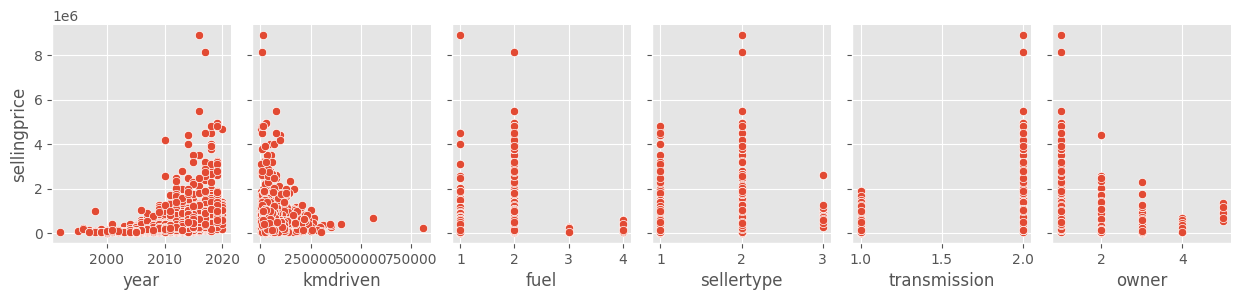

In [27]:
#PLOTTING INDEPENDANT AND DEPENDANT VARIABLE
sns.pairplot(data,x_vars=['year','kmdriven','fuel','sellertype','transmission','owner'],y_vars='sellingprice',height=3,aspect=0.7)

<Axes: >

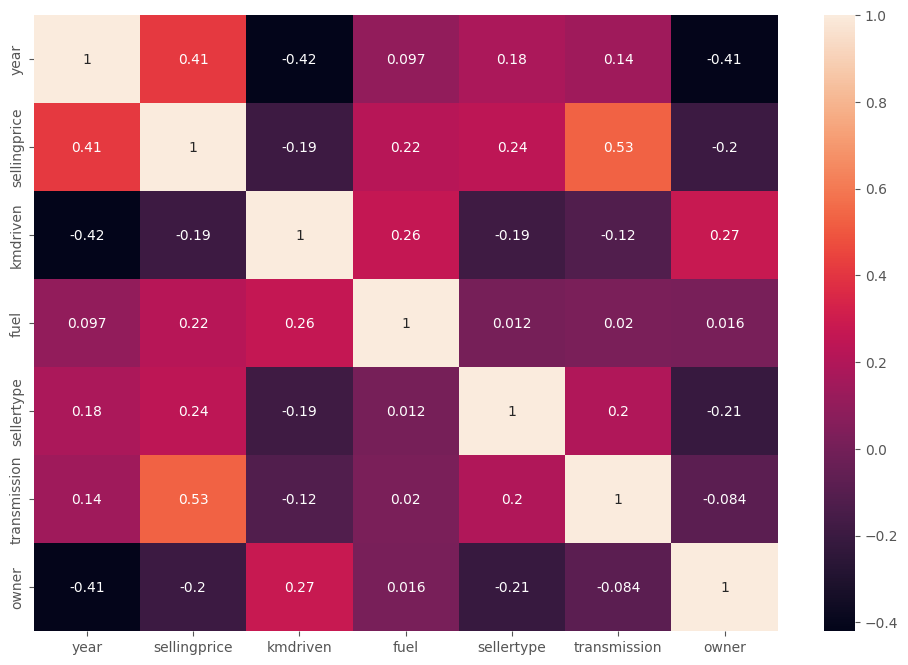

In [29]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)


In [30]:
dropdata=data.drop(['name','fuel','sellertype','transmission'],axis='columns')
dropdata

,year,sellingprice,kmdriven,owner
0,2007,60000,70000,1
1,2007,135000,50000,1
2,2012,600000,100000,1
3,2017,250000,46000,1
4,2014,450000,141000,2
...,...,...,...,...
4312,2019,2800000,10000,1
4313,2015,470000,170000,1
4314,2017,415000,20000,1
4315,2014,500000,82000,1


In [31]:
#linear Regression
from sklearn.linear_model import LinearRegression
x= data[['year','kmdriven','owner']]
y=data.sellingprice
model=LinearRegression()
model.fit(x,y)

print("intercept=",model.intercept_)
print("coefficient=",model.coef_)
list(zip(['year','kmdriven','owner'],model.coef_))

intercept= -108181907.38915981
coefficient= [ 5.40156246e+04 -2.30677506e-01 -2.49523002e+04]


[('year', 54015.62462647711),
 ('kmdriven', -0.2306775062022649),
 ('owner', -24952.30015338877)]

In [35]:
pred=model.predict([[2006,66782,3


]])
print(pred)

[83173.6058739]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
